Описание задачи\
В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и Ленинградской области за несколько лет.

Данные содержат различные параметры объявлений о продаже недвижимости: цена предложения, габариты квартиры/отдельных помещений, характеристики дома, этаж и этажность, расположение и расстояние до ключевых инфраструктурных объектов (крупного города, парка, магазина и т.д.)

Детальное описание данных\
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)\
balcony — число балконов\
ceiling_height — высота потолков (м)\
cityCenters_nearest — расстояние до центра города (м)\
days_exposition — сколько дней было размещено объявление (от публикации до снятия)\
first_day_exposition — дата публикации\
floor — этаж\
floors_total — всего этажей в доме\
is_apartment — апартаменты (булев тип)\
kitchen_area — площадь кухни в квадратных метрах (м²)\
last_price — цена на момент снятия с публикации\
living_area — жилая площадь в квадратных метрах (м²)\
locality_name — название населённого пункта\
open_plan — свободная планировка (булев тип)\
parks_around3000 — число парков в радиусе 3 км\
parks_nearest — расстояние до ближайшего парка (м)\
ponds_around3000 — число водоёмов в радиусе 3 км\
ponds_nearest — расстояние до ближайшего водоёма (м)\
rooms — число комнат\
studio — квартира-студия (булев тип)\
total_area — общая площадь квартиры в квадратных метрах (м²)\
total_images — число фотографий квартиры в объявлении

Постановка задачи
1. Провести обзор рынка недвижимости и первичную обработку данных
2. Найти среднюю стоиомость квадратного метра жилья (любой другой расчетный параметр)
3. Построить графики, отражающие данные о рынке недвижимости (любые ваши идеи и предложения)

Шаги по достижению цели
1. Откройте файл с данными и изучите общую информацию
2. Выполните предобработку данных
3. Проведите исследовательский анализ данных
4. Напишите общий вывод по исследованию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Получение данных из источника и изучение общей информации

In [3]:
# Откройте файл с данными и изучите общую информацию
df = pd.read_csv('real_estate_data.csv', sep = '\t')

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
df = df[['last_price','total_area','first_day_exposition','rooms','ceiling_height','floors_total',\
          'floor','kitchen_area','balcony','locality_name']]
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,kitchen_area,balcony,locality_name
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,8,25.0,NaN,Санкт-Петербург
1,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,1,11.0,2.0,посёлок Шушары
2,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,4,8.3,0.0,Санкт-Петербург
3,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,9,NaN,0.0,Санкт-Петербург
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,13,41.0,NaN,Санкт-Петербург


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23699 non-null  float64
 1   total_area            23699 non-null  float64
 2   first_day_exposition  23699 non-null  object 
 3   rooms                 23699 non-null  int64  
 4   ceiling_height        14504 non-null  float64
 5   floors_total          23613 non-null  float64
 6   floor                 23699 non-null  int64  
 7   kitchen_area          21421 non-null  float64
 8   balcony               12180 non-null  float64
 9   locality_name         23650 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 1.8+ MB


In [7]:
df.columns

Index(['last_price', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'floor', 'kitchen_area', 'balcony',
       'locality_name'],
      dtype='object')

In [8]:
df.isna().sum()

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
floor                       0
kitchen_area             2278
balcony                 11519
locality_name              49
dtype: int64

В данных 23 699 записей. \
Для целого ряда столбцов, есть пропущенные значения и некорректный тип данных.

In [9]:
# Предобработка данных

In [10]:
# Переведем тип данных столбца "дате первого размещения объявления" к типу дата
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Переведем тип данных столбца "число этажаей в здании" к типу int
df['floors_total'] = df['floors_total'].fillna(df['floor']).astype(int)

In [11]:
# Округлим общую площадь объектов до 2 знаков после запятой
df['total_area'].round(2)

0        108.00
1         40.40
2         56.00
3        159.00
4        100.00
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23699, dtype: float64

In [12]:
# Заменим этажность домов усредненным значением по всем объектам
def floors_total(row):
    if row['floors_total'] >= 0:
        return 0
    else:
        return df[df['floor'] == row['floor']]['floors_total'].median()

df['f'] = df.apply(floors_total, axis = 1)
df['floors_total'] = df['floors_total'].fillna(0)
df['floors_total'] = (df['f'] + df['floors_total']).astype('int')
df.drop('f', axis= 1 , inplace = True )
df['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15,  1, 20, 28, 36, 21, 35, 34, 60, 29, 33,
       52, 37])

In [13]:
# Заполним пустоты в данных о наличии балконов нулевыми значениями
df['balcony'] = df['balcony'].fillna(0)

In [14]:
# Заполним пустоты в данных площади кухонь, усреднив значения в разрезе общей площади и количества комнат
kitchen_area_median = df.groupby(['total_area','rooms'])['kitchen_area'].transform('median')
df['kitchen_area'] = df['kitchen_area'].fillna(kitchen_area_median)
df['kitchen_area'].isna().sum()

421

In [15]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
df['kitchen_area'].isna().sum()

0

In [16]:
# Заполним пустые параметры высоты потолков
ceiling_height_median = df.groupby('floor')['ceiling_height'].transform('median')
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median)
df['ceiling_height'].isna().sum()

4

In [17]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()

0

In [18]:
# Удалим объявления с пустыми локациями объектов
df = df.dropna(subset=['locality_name'])

In [19]:
# Проверим наличие дублей в датасете
df.duplicated().sum()

0

Дублей нет

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23650 non-null  float64       
 1   total_area            23650 non-null  float64       
 2   first_day_exposition  23650 non-null  datetime64[ns]
 3   rooms                 23650 non-null  int64         
 4   ceiling_height        23650 non-null  float64       
 5   floors_total          23650 non-null  int32         
 6   floor                 23650 non-null  int64         
 7   kitchen_area          23650 non-null  float64       
 8   balcony               23650 non-null  float64       
 9   locality_name         23650 non-null  object        
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(1)
memory usage: 1.9+ MB


In [21]:
df.isna().sum()

last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
floor                   0
kitchen_area            0
balcony                 0
locality_name           0
dtype: int64

Сделали преобразования типов данных (перевели данныe столбца "дата первого размещения объявления" к типу дата, превратили вещественные числа в целые)\
Улучшили заполнение некоторых признаков (заполнили пустоты по числу балконов, усреднили площади кухонь и высотности квартир)\
Убрали "битые" данные (строки, где не была заполнена локация)\
Проверили наличие дубликатов

In [22]:
# Исследовательский анализ данных

1. Анализ цены за квадратный метр жилья

In [23]:
# Добавим новые вспомогательные полонки в датасет, отражающие год, месяц и неделю,
# основываясь на дате размещения объявления
df['week_day'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [24]:
# Добавим столбец price_square_meter с ценой одного квадратного метра объекта 
# с точностью до двух знаков после запятой
df['price_on_metr'] = (df['last_price'] / df['total_area']).round(2).astype(int)
df

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,kitchen_area,balcony,locality_name,week_day,year,month,price_on_metr
0,13000000.0,108.00,2019-03-07,3,2.70,16,8,25.00,0.0,Санкт-Петербург,3,2019,3,120370
1,3350000.0,40.40,2018-12-04,1,2.60,11,1,11.00,2.0,посёлок Шушары,1,2018,12,82920
2,5196000.0,56.00,2015-08-20,2,2.65,5,4,8.30,0.0,Санкт-Петербург,3,2015,8,92785
3,64900000.0,159.00,2015-07-24,3,2.60,14,9,15.00,0.0,Санкт-Петербург,4,2015,7,408176
4,10000000.0,100.00,2018-06-19,2,3.03,14,13,41.00,0.0,Санкт-Петербург,1,2018,6,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,2017-03-21,3,3.70,5,3,13.83,0.0,Санкт-Петербург,1,2017,3,72490
23695,3100000.0,59.00,2018-01-15,3,2.65,5,4,8.50,0.0,Тосно,0,2018,1,52542
23696,2500000.0,56.70,2018-02-11,2,2.60,3,1,9.00,0.0,село Рождествено,6,2018,2,44091
23697,11475000.0,76.75,2017-03-28,2,3.00,17,12,23.30,2.0,Санкт-Петербург,1,2017,3,149511


In [25]:
df['price_on_metr'].describe()

count    2.365000e+04
mean     9.943180e+04
std      5.033794e+04
min      1.110000e+02
25%      7.661425e+04
50%      9.500000e+04
75%      1.142740e+05
max      1.907500e+06
Name: price_on_metr, dtype: float64

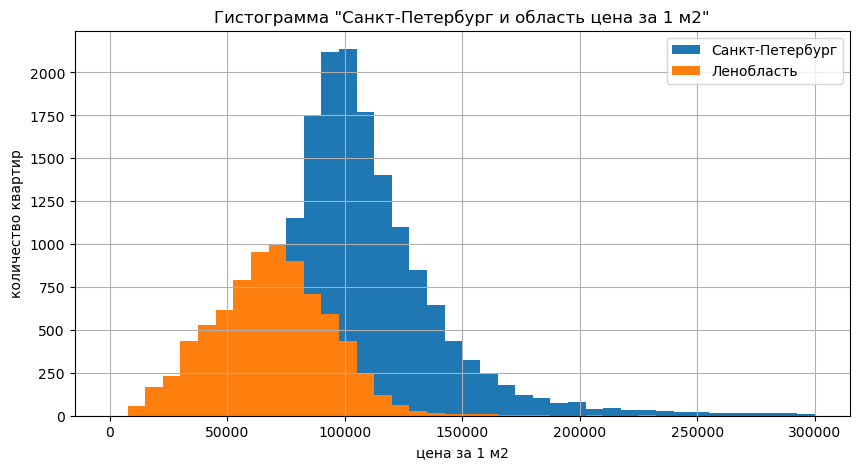

In [26]:
# Оставим значения до 300 000 рублей за м2 и построим гистограмму
df_piter = df.query('locality_name == "Санкт-Петербург"')
df_len_obl = df.query('locality_name != "Санкт-Петербург"')
df_piter['price_on_metr'].hist(figsize=(10,5), bins=40, range=(0,300000))
df_len_obl['price_on_metr'].hist(figsize=(10,5), bins=40, range=(0,300000))
plt.legend(['Санкт-Петербург', 'Ленобласть'])
plt.title('Гистограмма "Санкт-Петербург и область цена за 1 м2"')
plt.xlabel('цена за 1 м2')
plt.ylabel('количество квартир')
plt.ticklabel_format(style = 'plain')
plt.show()

In [27]:
print('средняя цена за м2 в Санкт-Петербурге: ', round(df_piter['price_on_metr'].mean(), 2), 'рублей')

средняя цена за м2 в Санкт-Петербурге:  114848.57 рублей


In [28]:
print('средняя цена за м2 в Ленобласти: ', round(df_len_obl['price_on_metr'].mean(), 2), 'рублей')

средняя цена за м2 в Ленобласти:  68864.65 рублей


2. Анализ общей площади объектов

In [29]:
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

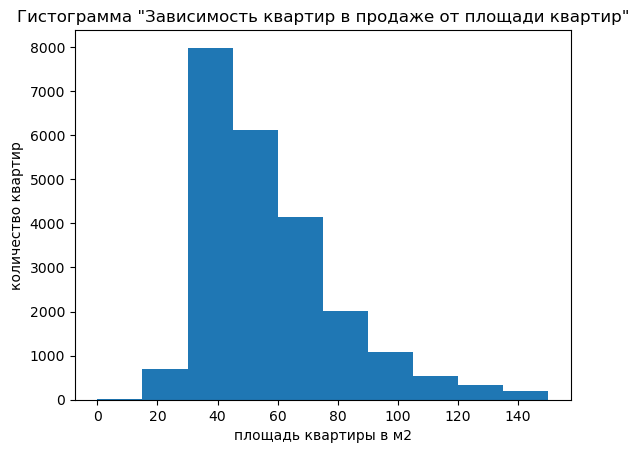

In [30]:
# Оставим значения до 150 м2 построим гистограмму
plt.hist(df['total_area'], range=(0,150))
plt.title('Гистограмма "Зависимость квартир в продаже от площади квартир"')
plt.xlabel('площадь квартиры в м2')
plt.ylabel('количество квартир')
plt.show()

3. Анализ локаций

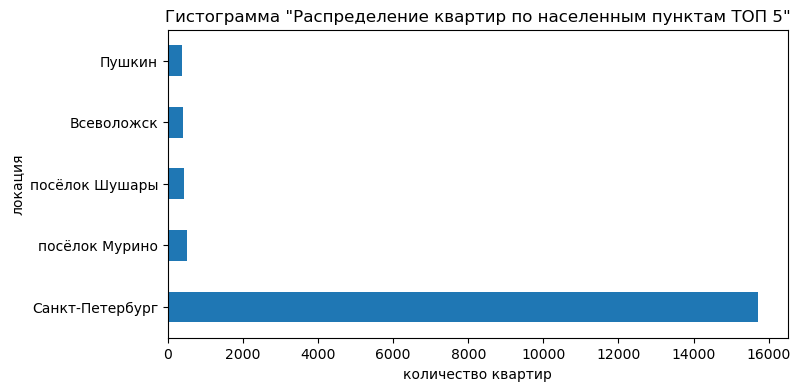

In [31]:
df['locality_name'].value_counts().head(5).plot(kind = 'barh',figsize=(8,4))
plt.title('Гистограмма "Распределение квартир по населенным пунктам ТОП 5"')
plt.xlabel('количество квартир')
plt.ylabel('локация')
plt.show()

4. Анализ площади кухни

In [32]:
df['kitchen_area'].describe()

count    23650.000000
mean        10.457556
std          5.739221
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max        112.000000
Name: kitchen_area, dtype: float64

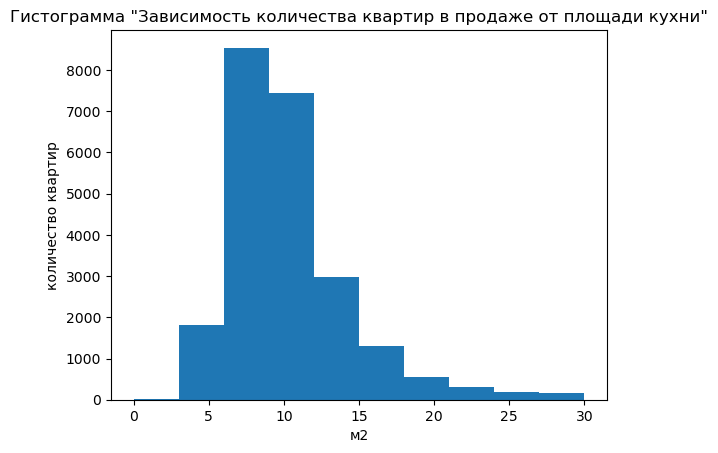

In [33]:
plt.hist(df['kitchen_area'], range=(0,30))
plt.title('Гистограмма "Зависимость количества квартир в продаже от площади кухни"')
plt.xlabel('м2')
plt.ylabel('количество квартир')
plt.show()

5. Анализ этажности

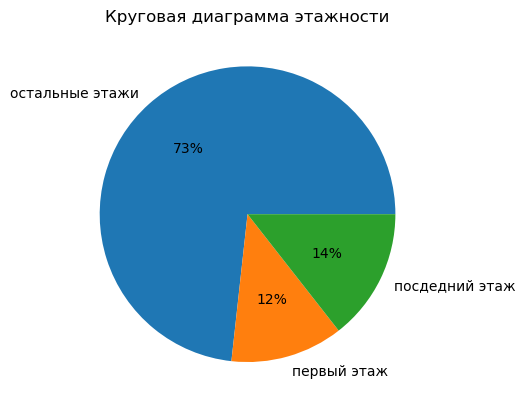

In [34]:
df['floor_category'] = np.where(df['floor'] == 1, 'первый этаж',
                       np.where(df['floor'] == df['floors_total'],'посдедний этаж','остальные этажи'))
df.groupby('floor_category').size().plot(kind = 'pie', autopct = '%1.0f%%')
plt.title('Круговая диаграмма этажности')
plt.show()

6. Анализ цены

In [35]:
df['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

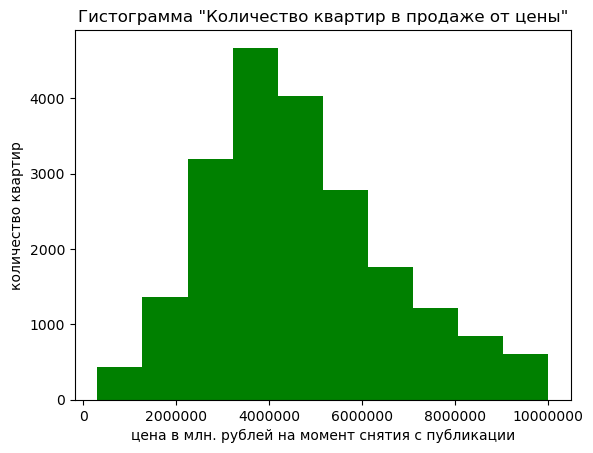

In [36]:
plt.hist(df['last_price'], range = (300000,10000000),color ='green')
plt.title('Гистограмма "Количество квартир в продаже от цены"')
plt.xlabel('цена в млн. рублей на момент снятия с публикации')
plt.ylabel('количество квартир')
plt.ticklabel_format(style = 'plain')
plt.show()

7. Анализ комнатности

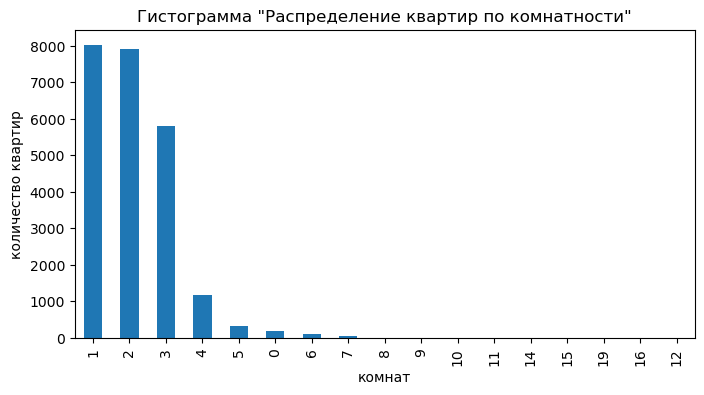

In [60]:
df['rooms'].value_counts().plot(kind = 'bar', figsize=(8,4))
plt.title('Гистограмма "Распределение квартир по комнатности"')
plt.xlabel('комнат')
plt.ylabel('количество квартир')
plt.show()

8. Анализ высоты потолков

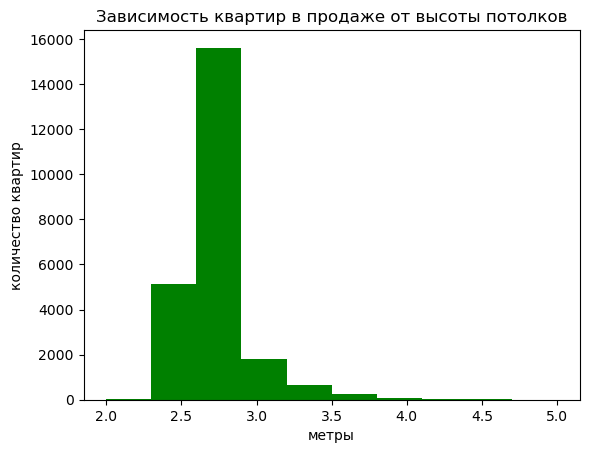

In [38]:
plt.hist(df['ceiling_height'], range = (2,5), color ='green')
plt.title('Зависимость квартир в продаже от высоты потолков')
plt.xlabel('метры')
plt.ylabel('количество квартир')
plt.show()

9. Анализ размещений объявлений

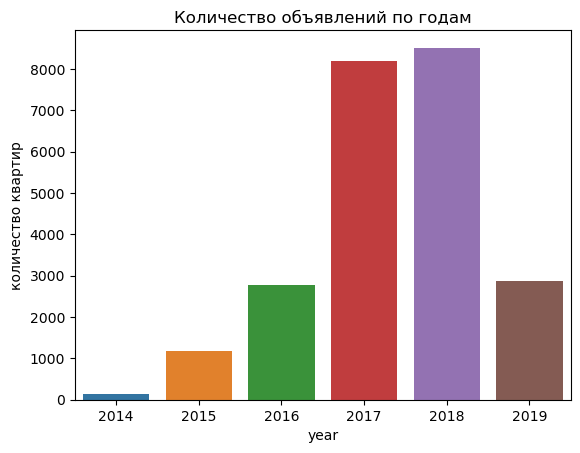

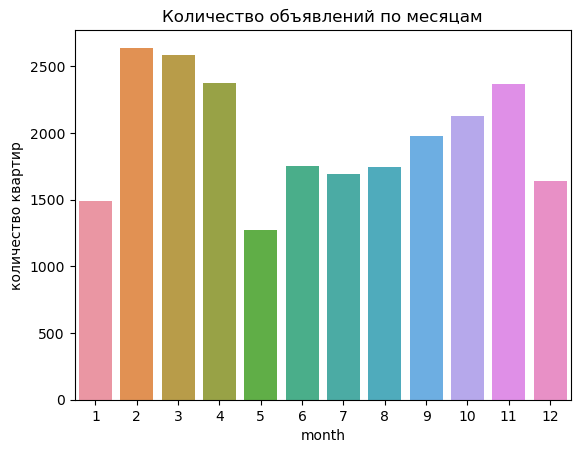

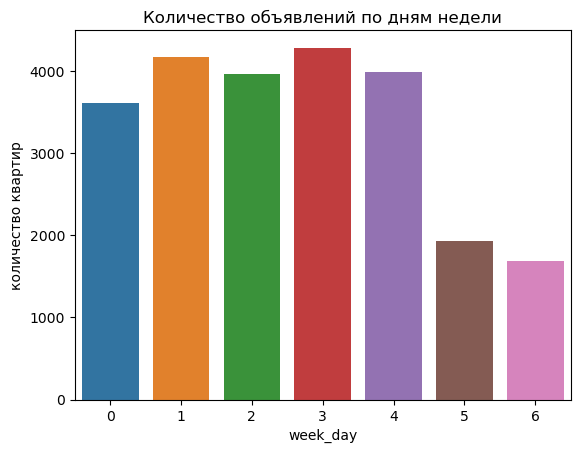

In [41]:
for column,name in zip(['year','month', 'week_day'],['Количество объявлений по годам',
                                                    'Количество объявлений по месяцам',
                                                    'Количество объявлений по дням недели']):
    ax = sns.countplot(data=df, x=df[column])
    ax.set_title(name)
    ax.set_xlabel(column)
    ax.set_ylabel('количество квартир')
    ax.set_xticklabels(ax.get_xticklabels())
    plt.show()

10. Анализ этажности

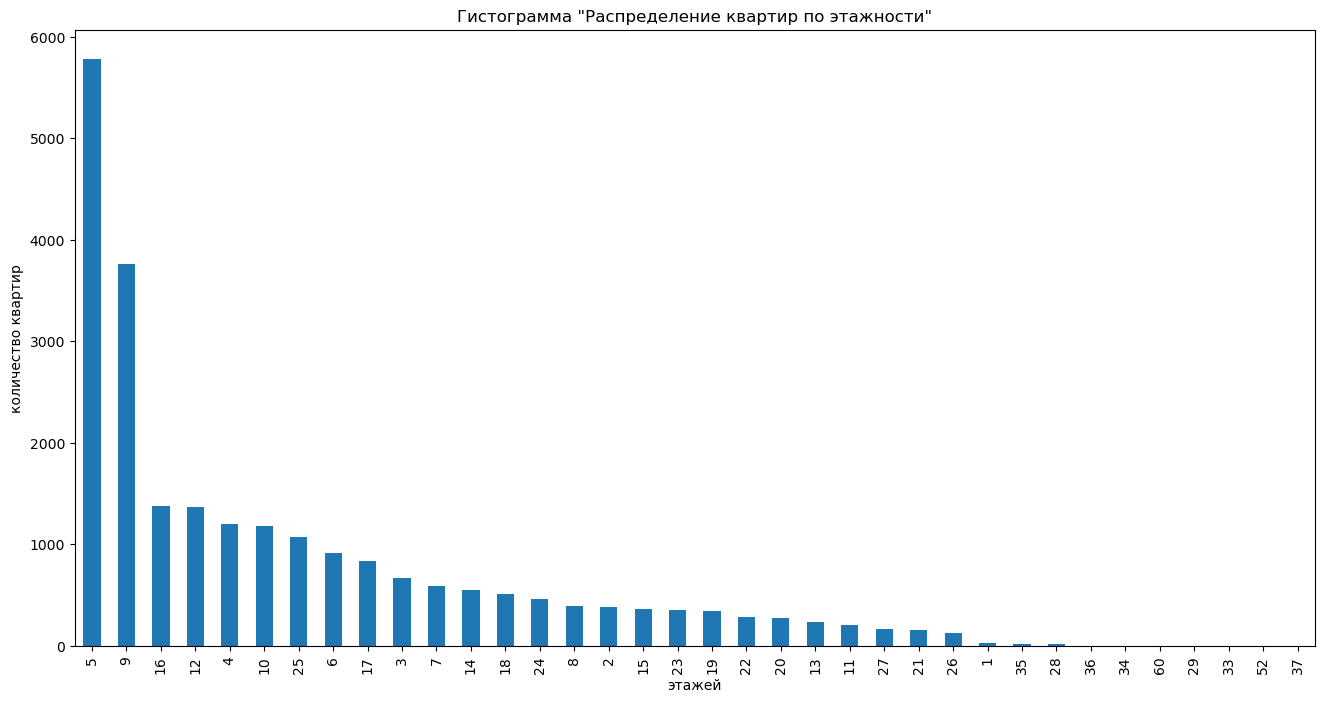

In [70]:
df['floors_total'].value_counts().plot(kind = 'bar', figsize=(16,8))
plt.title('Гистограмма "Распределение квартир по этажности"')
plt.xlabel('этажей')
plt.ylabel('количество квартир')
plt.show()

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22'),
 Text(22, 0, '23'),
 Text(23, 0, '24'),
 Text(24, 0, '25'),
 Text(25, 0, '26'),
 Text(26, 0, '27'),
 Text(27, 0, '28'),
 Text(28, 0, '29'),
 Text(29, 0, '33'),
 Text(30, 0, '34'),
 Text(31, 0, '35'),
 Text(32, 0, '36'),
 Text(33, 0, '37'),
 Text(34, 0, '52'),
 Text(35, 0, '60')]

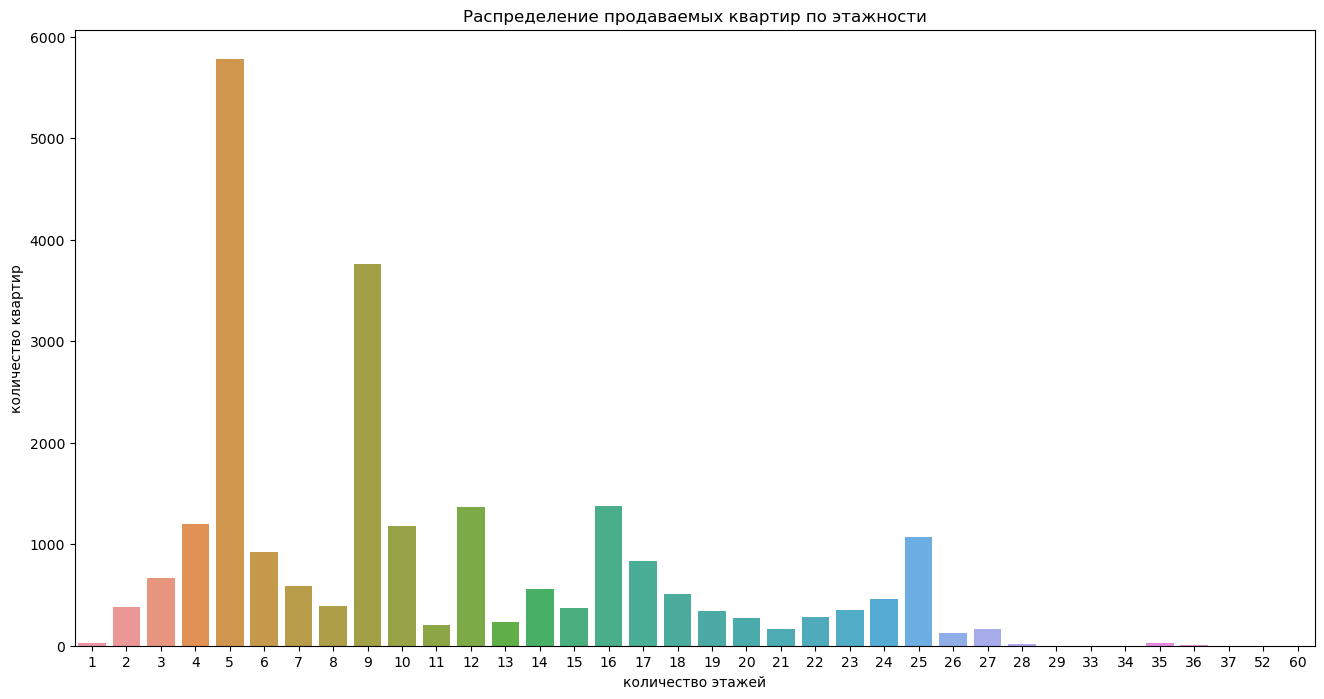

In [71]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data=df, x=df['floors_total'])
ax.set_title('Распределение продаваемых квартир по этажности')
ax.set_xlabel('количество этажей')
ax.set_ylabel('количество квартир')
ax.set_xticklabels(ax.get_xticklabels())

11. Корреляционный анализ

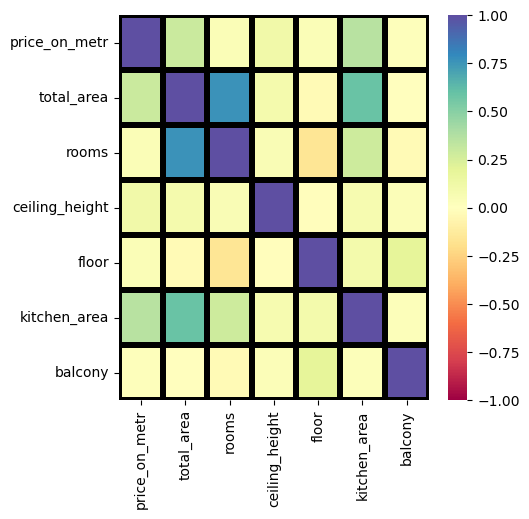

In [49]:
plt.figure(figsize=(5,5))
sns.heatmap(df_piter[['price_on_metr','total_area','rooms','ceiling_height',
                      'floor','kitchen_area','balcony']]
               .corr(), vmin=-1, vmax=1, center= 0, cmap = 'Spectral', linewidths=3, linecolor='black')
plt.show()

In [47]:
df_piter['total_area'].corr(df_piter['price_on_metr'])

0.2944989112137731

In [50]:
df_piter['kitchen_area'].corr(df_piter['price_on_metr'])

0.3568607141488673

Существует сильная прямая связь между стоимостью квадратного метра и площадью кухни

Вывод по исследованию\
Средняя цена за м2 в Санкт-Петербурге существенно выше, чем в Ленобласти:  114 848 рублей против 68 864 рублей\
Средний размер продаваемых квартир  60 м2, а медианный размер 52 м2\
Среди предложений больше всего однокомнатных квартир\
Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках\
Максимальное предложение квартир - в феврале, минимальное - в мае